In [2]:
import numpy as np
import matplotlib.pyplot as plt
random_data = np.load('output/random_attack_ctl_defense.npy')
targeted_data = np.load('output/heuristic_attack_ctl_defense.npy')
rl_data_single = np.load('output/rl_single_attack_ctl_defense.npy')
rl_data_pairs = np.load('output/random_attack_rl_pairs_defense.npy')
rl_data_triples = np.load('output/rl_triplets_attack_ctl_defense.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'output/random_attack_ctl_defense.npy'

IndexError: index 1 is out of bounds for axis 0 with size 1

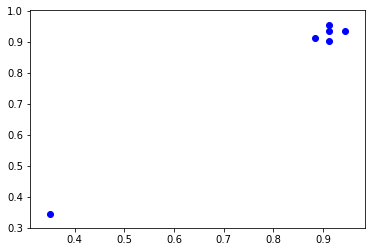

In [15]:
plt.scatter(random_data[0],random_data[1],color='b')
plt.scatter(targeted_data[0],targeted_data[1],color='r')
plt.scatter(rl_data_single[0],rl_data_single[1],color='g')
plt.scatter(rl_data_pairs[0],rl_data_pairs[1],color='purple')
plt.scatter(rl_data_triples[0],rl_data_triples[1],color='orange')
plt.ylabel('Percent of Nodes Down After Cascade')
plt.xlabel('Percent of Nodes Attacked')
plt.legend(['Random Attack','Node Degree Attack','RL Attack (single nodes)','RL Attack (pairs)','RL Attack (triplets)'])
plt.grid()

In [16]:
print(targeted_data[1][-19])

IndexError: index 1 is out of bounds for axis 0 with size 1

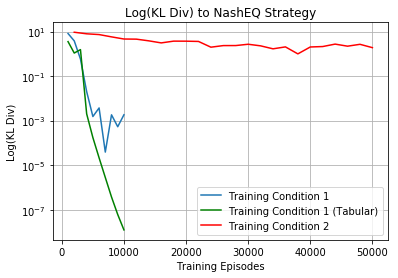

In [13]:
import json
#single_json = 'output/run-p10_singles_mp56_real_2-tag.json'
#pair_json = 'output/run-p10_pairs_mp56_real_1.json'
plot1 = 'output/training_curves/run-10c1d1_mem_retry-tag-Policy_nash_kl_div.json'
plot2 = 'output/training_curves/run-10c1d1_memorize_tabular_lr05-tag-Policy_nash_kl_div.json'
plot3 = 'output/training_curves/run-10c1d1_retry-tag-Policy_nash_kl_div.json'

with open(plot1) as f:
    out = json.load(f)
    steps = [l[1] for l in out]
    rewards = [l[2] for l in out]
with open(plot2) as f:
    out = json.load(f)
    steps2 = [l[1] for l in out]
    rewards2 = [l[2] for l in out]
with open(plot3) as f:
    out = json.load(f)
    steps3 = [l[1] for l in out]
    rewards3 = [l[2] for l in out]
# with open(pair_json) as f:
#     out = json.load(f)
#     steps_pair = [l[1] for l in out]
#     rewards_pair = [l[2] for l in out]
# with open(triple_json) as f:
#     out = json.load(f)
#     steps_triple = [l[1] for l in out]
#     rewards_triple = [l[2] for l in out]
plt.semilogy(steps[:10],rewards[:10])
plt.semilogy(steps2[:10],rewards2[:10],color='g')
plt.semilogy(steps3,rewards3,color='r')

#plt.scatter(steps_pair,rewards_pair,color='purple')
#plt.scatter(steps_triple,rewards_triple,color='orange')
#plt.plot(steps_single,0.518*np.ones(len(steps_single)),color='blue')
#plt.plot(steps_single,0.787*np.ones(len(steps_single)),color='red')
plt.title('Log(KL Div) to NashEQ Strategy')
plt.ylabel('Log(KL Div)')
plt.xlabel('Training Episodes')
#plt.ylim([0,0])
plt.legend(['Training Condition 1','Training Condition 1 (Tabular)','Training Condition 2'],loc='best')
plt.grid()

/home/james/anaconda3/envs/cn_gym_37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/james/anaconda3/envs/cn_gym_37/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


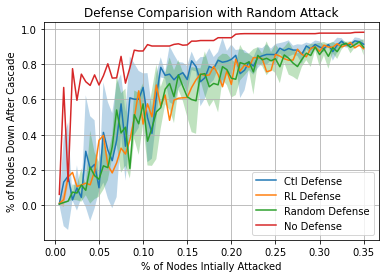

In [163]:
ctl_defense = np.load('output/random_attack_ctl_defense.npy')
rl_defense = np.load('output/random_attack_rl_defense.npy')
random_defense = np.load('output/random_attack_random_defense.npy')
no_def = np.load('output/random_attack_no_defense.npy')
import scipy.stats as st
ctl_metrics = np.zeros([ctl_defense.shape[0],3]) #form is [mean,conf_interval_low,conf_interval_high]
rl_metrics = np.zeros([rl_defense.shape[0],3]) 
random_metrics = np.zeros([random_defense.shape[0],3]) 
no_def_metric = np.zeros([no_def.shape[0],3])
interval = 0.9
for i in range(random_defense.shape[0]):
    ctl_interval = st.t.interval(alpha=interval,df=len(ctl_defense[i,1:])-1,loc=np.mean(ctl_defense[i,1:]),scale=st.sem(ctl_defense[i,1:]))
    ctl_metrics[i] = [np.mean(ctl_defense[i,1:]),ctl_interval[0],ctl_interval[1]]
    rl_interval = st.t.interval(alpha=interval,df=len(rl_defense[i,1:])-1,loc=np.mean(rl_defense[i,1:]),scale=st.sem(random_attack_rl_defense[i,1:]))
    rl_metrics[i] = [np.mean(rl_defense[i,1:]),rl_interval[0],rl_interval[1]]
    random_interval = st.t.interval(alpha=interval,df=len(random_defense[i,1:])-1,loc=np.mean(random_defense[i,1:]),scale=st.sem(random_defense[i,1:]))
    random_metrics[i] = [np.mean(random_defense[i,1:]),random_interval[0],random_interval[1]]
    no_def_interval = st.t.interval(alpha=interval,df=len(no_def_data[i,1:])-1,loc=np.mean(no_def_data[i,1:]),scale=st.sem(no_def_data[i,1:]))
    no_def_metric[i] = [np.mean(no_def_data[i,1:]),no_def_interval[0],no_def_interval[1]]
fig, ax = plt.subplots()
alpha = 0.3
x_max = 0
ax.plot(ctl_defense[x_max:,0],ctl_metrics[x_max:,0])
ax.fill_between(ctl_defense[x_max:,0],ctl_metrics[x_max:,1],ctl_metrics[x_max:,2],alpha=alpha)
ax.plot(rl_defense[x_max:,0],rl_metrics[x_max:,0])
ax.fill_between(rl_defense[x_max:,0],rl_metrics[x_max:,1],rl_metrics[x_max:,2],alpha=alpha)
ax.plot(random_defense[x_max:,0],random_metrics[x_max:,0])
ax.fill_between(random_defense[x_max:,0],random_metrics[x_max:,1],random_metrics[x_max:,2],alpha=alpha)
ax.plot(no_def_data[x_max:,0],no_def_metric[x_max:,0])
ax.fill_between(no_def_data[x_max:,0],no_def_metric[x_max:,1],no_def_metric[x_max:,2],alpha=alpha)
ax.legend(['Ctl Defense','RL Defense','Random Defense','No Defense'])
ax.set_xlabel('% of Nodes Intially Attacked')
ax.set_ylabel('% of Nodes Down After Cascade')
ax.set_title('Defense Comparision with Random Attack')
ax.grid()

In [107]:
# plt.scatter(random_data[0],random_data[1],color='b')
# plt.scatter(random_attack_rl_defense[:,0],random_attack_rl_defense[:,1],color='r')
# plt.scatter(random_attack_rl_defense_zs[:,0],random_attack_rl_defense_zs[:,1],color='g')
# plt.title('Defender Performance on Random Attacker')
# plt.ylabel('% of Nodes Down after Cascade')
# plt.xlabel('Time Step')
# plt.legend(['Benchmark Defender', 'RL Defender Original Reward','RL Defender Zero Sum Reward'],loc='lower right')
# plt.grid()
#print(random_data[0,1:])
#print(st.t.interval(alpha=0.95,df=len(random_data[0,1:])-1,loc=np.mean(random_data[0,1:]),scale=st.sem(random_data[0,1:])))
print(random_attack_rl_defense[:,0])
print(rl_metrics)

[0.35  0.345 0.34  0.335 0.33  0.325 0.32  0.315 0.31  0.305 0.3   0.295
 0.29  0.285 0.28  0.275 0.27  0.265 0.26  0.255 0.25  0.245 0.24  0.235
 0.23  0.225 0.22  0.215 0.21  0.205 0.2   0.195 0.19  0.185 0.18  0.175
 0.17  0.165 0.16  0.155 0.15  0.145 0.14  0.135 0.13  0.125 0.12  0.115
 0.11  0.105 0.1   0.095 0.09  0.085 0.08  0.075 0.07  0.065 0.06  0.055
 0.05  0.045 0.04  0.035 0.03  0.025 0.02  0.015 0.01  0.005]
[0.01091061686949224, 0.004248090741624085, 0.017573142997360396]


In [25]:
with open('output/test_results/Polish_explt10c2d1_eval_15k.json') as f:
    results = json.load(f)
policies = np.asarray(results['policies'])
exploitability = np.asarray(results['exploitability'])
exploiter_rew = np.asarray(results['exploiter_rew'])
ego_rew = np.asarray(results['ego_attacker_rew'])
#nash_kls = np.asarray(results['nash_kl_div'])
#print(np.mean(nash_kls,axis=1))
#print(np.mean(policies,axis=1))
#print(np.mean(ego_rew,axis=1))

# print(np.mean(exploiter_rew,axis=1)[:,0])
# print(np.mean(exploiter_rew,axis=1)[:,1])
# print(np.mean(exploitability,axis=1))

print(np.mean(ego_rew))
print(np.mean(np.mean(exploiter_rew,axis=1)[:,0]))
print(np.mean(np.mean(exploiter_rew,axis=1)[:,1]))
print(np.mean(exploitability))
#print(results['nash_eqs'][-1])

0.1458245908518674
0.14777171632396136
-0.14600083927822072
0.001770877045740673


In [49]:
#p-vals
from scipy.stats import ttest_ind_from_stats
with open('output/test_results/Polish_explt10c2d1NN_eval.json') as f:
    nn_res = json.load(f)
nn_explt = np.asarray(nn_res['exploitability'])
with open('output/test_results/Polish_expltRandom_eval.json') as f:
    rand_res = json.load(f)
rand_explt = np.asarray(rand_res['exploitability'])

with open('output/test_results/Polish_expltHeuristic_eval.json') as f:
    heur_res = json.load(f)
heur_explt = np.asarray(heur_res['exploitability'])
_,p_rand = ttest_ind_from_stats(np.mean(nn_explt),np.std(nn_explt),len(nn_explt[0]),
                                np.mean(rand_explt),np.std(rand_explt),len(rand_explt[0]))
_,p_heur = ttest_ind_from_stats(np.mean(nn_explt),np.std(nn_explt),len(nn_explt[0]),
                                np.mean(heur_explt),np.std(heur_explt),len(heur_explt[0]))
print('NN explotability: {}/{}'.format(np.mean(nn_explt),np.std(nn_explt)))
print('Random explotability: {}/{}'.format(np.mean(rand_explt),np.std(rand_explt)))
print('Heuristic explotability: {}/{}'.format(np.mean(heur_explt),np.std(heur_explt)))
print('P-value to Random:',p_rand)
print('P-value to Heuristic:',p_heur)

NN explotability: -0.0015127989928661342/0.005840691674043849
Random explotability: 0.00266848510281158/0.005023452080587153
Heuristic explotability: -0.012967268149391522/0.004610403601642489
P-value to Random: 1.0612545968876708e-61
P-value to Heuristic: 0.0


In [41]:
#Backup vals
nn_mean = 0.0218
nn_std = 0.0274
rand_mean = 0.0267
rand_std = 0.0225
heur_mean = 0.0338
heur_std = 0.0134

_,p_rand = ttest_ind_from_stats(nn_mean,nn_std,1000,rand_mean,rand_std,1000)
_,p_heur = ttest_ind_from_stats(nn_mean,nn_std,1000,heur_mean,heur_std,1000)
print('P-value to Random:',p_rand)
print('P-value to Heuristic:',p_heur)

P-value to Random: 1.3034870884684106e-05
P-value to Heuristic: 2.80287496049634e-34
